# Análise de doenças cardíacas

# Definição do problema

O objetivo primário deste projeto consiste em, dado um conjunto de dados contendo o histórico médico de pacientes com e sem doença cardíaca, é possível determinar, através destes dados se um paciente terá ou não doença cardíaca?

O objetivo secundário é utilizar técnicas de análise de dados, bem como análise exploratória, e técnicas de aprendizado de máquina para construir um modelo preditivo que atenda ao objetivo primário.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import seaborn as sns
from IPython.display import display

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'winter_r'


# Análise exploratória

Começando pela leitura do arquivo de dados:

In [2]:
df = pd.read_csv('./heart-disease.csv')

display(df.head(3), df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


None

Com a leitura do arquivo `*.csv` é possível verificar que todos os dados já estão tratados de forma numérica. Não há valores nulos nem faltantes.

## Dicionário de atributos

Como os dados já estão limpos, entendamos o significado de cada atributo:

* `age`: idade, em anos
* `sex`: sexo. 1 = masculino, 2 = feminino
* `cp`: tipo de dor no peito. medido como intensidade, de 0 a 3
* `trestbps`: pressão sanguínea do paciente em estado "descansado". medido em mmHg
* `chol`: Nível de colesterol: 
* `fbs`: nível de açúcar no sangue em jejum. Medido de forma binária (0 -> nível menor que 120mg/dl; 1 -> caso contrário). 1 pode indicar diabetes
* `restecg`: resultado do eletrocardiograma do paciente descansado. Medido em 0,1,2.
  * Não há informação do que significam esses 3 níveis
* `thalach`: Maior ritmo cardíaco alcançado em BPM
* `exang`: Exercício introduziu angina? Em outras palavras, se o exercício introduziu dor no peito.
* `oldpeak` = Valor máximo do pico negativo no eletrocardiograma. Mede o quão "anormal" o coração contrai abaixo da linha mínima de contração no eletrocardiograma.
* `slope`: inclinação do oldpeak (0 -> inclinação positiva, 1-> inclinação nula, -> inclinação negativa).
* `ca`: número de vasos sanguíneos coloridos por fluoroscopia. (0 a 3).
* `thal`: Inconclusivo. 3 -> normal, 6 -> defeito corrigido, 7 -> defeito com possibilidade de correção
* `target`: se a pessoa tem ou não problemas cardíacos

## Hipóteses

Com um conhecimento básico dos dados, perguntam-se quais os atributos contribuem positiva ou negativamente para o paciente possuir doenças cardíacas:

1. A idade e sexo são relevantes?
2. Atributos como dor no peito e angina causada por exercício são fatores?
3. Outras ...

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

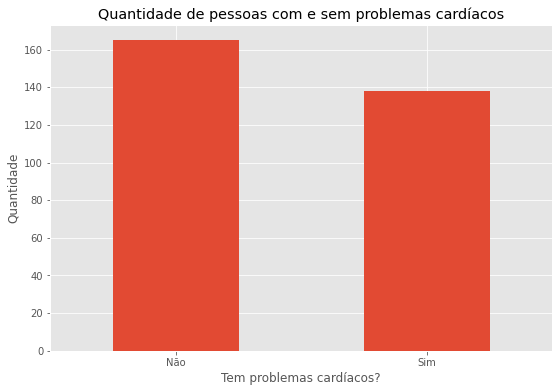

In [3]:
_, ax = plt.subplots(figsize=(9, 6))
df['target'].value_counts().plot(kind='bar', ax=ax,)
ax.set(
    title='Quantidade de pessoas com e sem problemas cardíacos',
    ylabel='Quantidade',
    xlabel='Tem problemas cardíacos?')
ax.set_xticklabels(['Não', 'Sim'], rotation=0)


Com o gráfico acima é possível inferir que os dados estão bem distribuídos entre pessoas com e sem doenças cardíacas

[Text(0, 0, 'Feminino'), Text(1, 0, 'Masculino')]

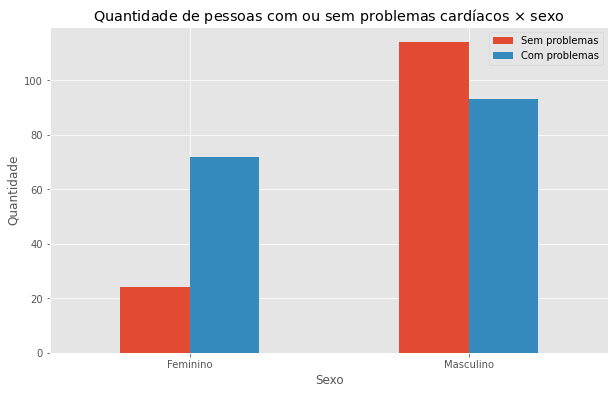

In [4]:
_, ax = plt.subplots(figsize=(10, 6))
pd.crosstab(df['sex'], df['target']).plot(kind='bar', ax=ax)
ax.set(title=r'Quantidade de pessoas com ou sem problemas cardíacos $\times$ sexo',
       ylabel='Quantidade',
       xlabel='Sexo')
ax.legend(['Sem problemas', 'Com problemas'])
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0)


O número de mulheres e homens com problemas cardíacos é similar, porém o número de homens sem problemas é muito maior do que o de mulheres sem problemas. Não é uma informação muito conclusiva, mas indica uma correlação negativa sobre os sexo e a possibilidade de ter doença cardíaca ou não.

[Text(0.5, 1.0, 'Distribuição de idade'),
 Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Quantidade')]

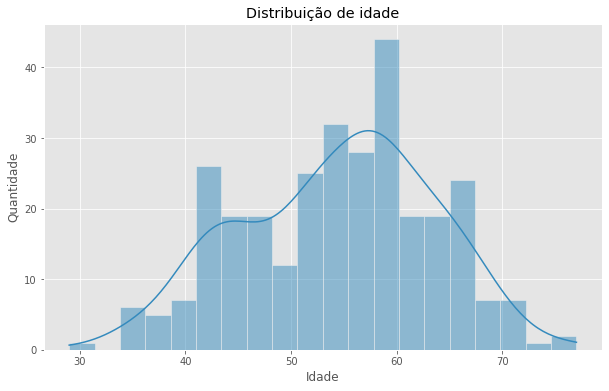

In [5]:
_, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(df['age'], kde=True, bins=20)
ax.set(
    title=r'Distribuição de idade',
    xlabel='Idade',
    ylabel='Quantidade'
)


A distribuição de idade aproxima-se de uma curva normal, com uma depressão localizada aprox. 1 desvio padrão à esquerda.

[Text(0, 0, 'Sem problemas'), Text(1, 0, 'Com problemas')]

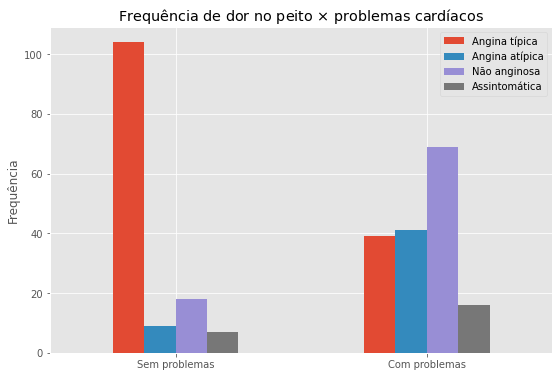

In [6]:
_, ax = plt.subplots(figsize=(9, 6))
pd.crosstab(df['target'], df['cp']).plot(kind='bar', ax=ax)
ax.set(
    title=r'Frequência de dor no peito $\times$ problemas cardíacos',
    xlabel=None,
    ylabel='Frequência',
)
ax.legend([
    'Angina típica',
    'Angina atípica',
    'Não anginosa',
    'Assintomática'])

ax.set_xticklabels(['Sem problemas', 'Com problemas'], rotation=0)


Pessoas sem problemas cardíacos tendem a ter dores classificadas como "Angina típica" e pouco dos outros tipos de dores. Isso pode indicar uma correlação negativa entre a angina típica e a presença de problemas cardíacos

Pessoas com problemas cardíacos têm os tipos de dores distribuídas entre angina típica e atípica, apresentam um salto na dor não anginosa, e poucos casos de dor assintomática.



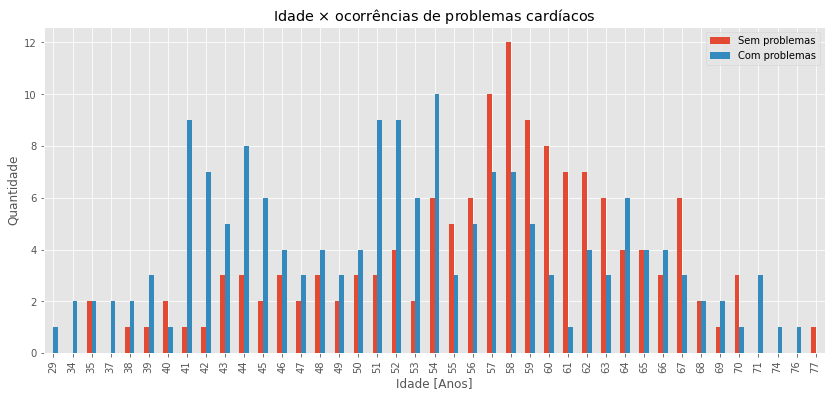

In [7]:
_, ax = plt.subplots(figsize=(14, 6))
pd.crosstab(df['age'], df['target']).plot(kind='bar', ax=ax)
ax.set(
    title=r'Idade $\times$ ocorrências de problemas cardíacos',
    ylabel='Quantidade',
    xlabel='Idade [Anos]'
)

ax.legend(['Sem problemas', 'Com problemas'], title=None)


A figura acima indica que não há uma relação direta entre idade e problemas cardíacos. A quantidade de pacientes com problemas se mantém a mesma com o aumento da idade.

De fato há mais adultos (de 40 a 55 anos) com problemas cardíacos do que sem.

Isso não implica que jovens têm mais chances de ter problemas cardíacos, só indica que o DataFrame está bem distribuído nos casos positivos. De fato, a suspeita é confirmada quando mostrada a matriz de correlação das *features* posteriormente.

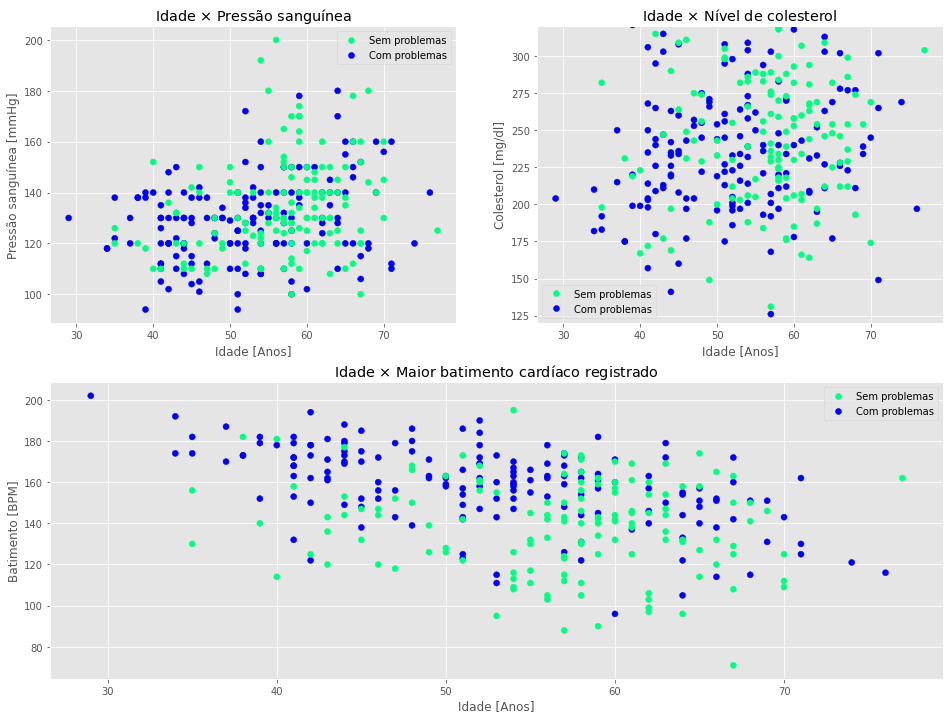

In [8]:
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])


sc0 = ax0.scatter(
    x=df['age'],
    y=df['trestbps'],
    c=df['target'],
)

ax0.set(
    title=r'Idade $\times$ Pressão sanguínea',
    ylabel='Pressão sanguínea [mmHg]',
    xlabel='Idade [Anos]'
)

ax0.legend(handles=sc0.legend_elements()[0], labels=[
    'Sem problemas', 'Com problemas'])


sc1 = ax1.scatter(
    x=df['age'],
    y=df['chol'],
    c=df['target'],
)
ax1.set(
    title=r'Idade $\times$ Nível de colesterol',
    ylabel='Colesterol [mg/dl]',
    xlabel='Idade [Anos]',
    ylim=[120, 320]
)

ax1.legend(handles=sc1.legend_elements()[0], labels=[
    'Sem problemas', 'Com problemas'])


sc2 = ax2.scatter(
    x=df['age'],
    y=df['thalach'],
    c=df['target'],
)

ax2.set(
    title=r'Idade $\times$ Maior batimento cardíaco registrado',
    ylabel='Batimento [BPM]',
    xlabel='Idade [Anos]'
)

ax2.legend(handles=sc2.legend_elements()[0], labels=[
    'Sem problemas', 'Com problemas'])


Pessoas de pouca idade com batimentos muito altos podem ter indícios de doença cardíaca, enquanto pessoas de maior idade apresentam pouca relação entre frequência cardíaca e problemas cardíacos

<AxesSubplot:title={'center':'Matriz de corrrelação da base de dados'}>

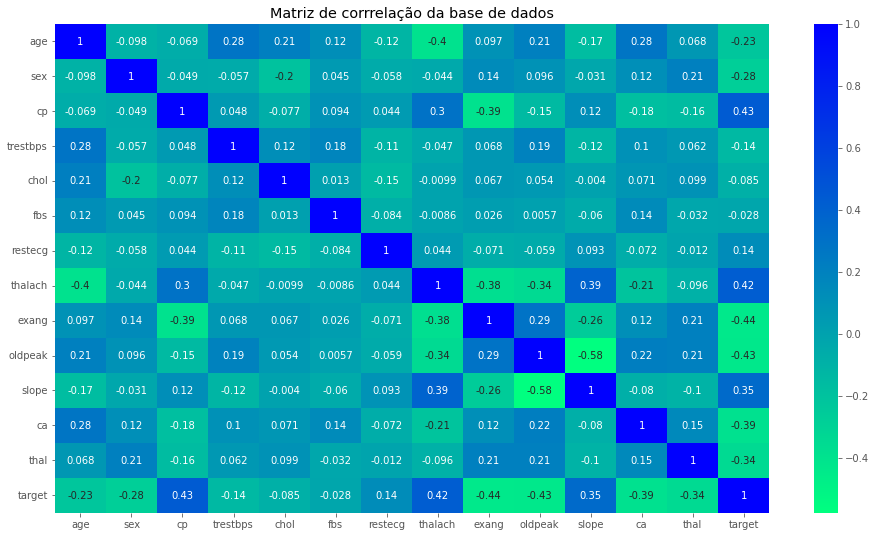

In [9]:
corr_mat = df.corr()
plt.figure(figsize=(16, 9))
plt.title('Matriz de corrrelação da base de dados')
sns.heatmap(
    corr_mat,
    annot=True,
    cmap='winter_r'
)


Analisando a matriz de correlação, podemos verificar:

1. A maioria das correlações são fracas ou moderadas. Não há sequer uma correlação forte.
2. As variáveis que relatam melhor a correlação com problemas cardíacos são:
   1. `cp`
   2. `thalach`
   3. `slope`
   4. `exang`
   5. `oldpeak`
3. Algumas variáveis possuem correlação forte entre si. Exemplificando, `slope` e `oldpeak` contam com alta correlação. Provavelmente pois são dados do eletrocardiograma.

# Modelagem e análise preditiva

Seguindo a documentação da sklearn:

![](https://scikit-learn.org/stable/_static/ml_map.png)

Há algumas opções:

- KNN
- SVM
- Ensemble
- Linear model

## Seleção do modelo

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


def train_score(models):
    np.random.seed(6)

    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model_scores = {}
    for n, m in models.items():
        m.fit(X_train, y_train)
        model_scores[n] = m.score(X_test, y_test)
    return model_scores


In [11]:
models = {
    'LinearSVC': LinearSVC(max_iter=50000),
    'RandomForest': RandomForestClassifier(),
    'LogReg': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier()
}

model_df = pd.DataFrame(train_score(models), index=['acc'])
model_df


/home/pesadaum/development/projects/predict-heart-disease/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,LinearSVC,RandomForest,LogReg,AdaBoost,KNN
acc,0.803279,0.803279,0.836066,0.754098,0.672131


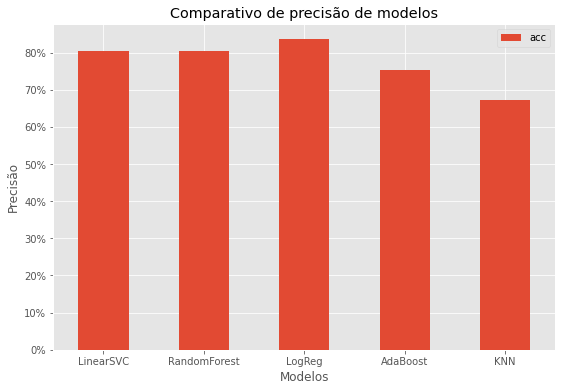

In [12]:
_, ax = plt.subplots(figsize=(9, 6))
model_df.T.plot(kind='bar', ax=ax)

ax.set(
    ylabel='Precisão',
    title='Comparativo de precisão de modelos',
    xlabel='Modelos')
    
ax.set_xticklabels(model_df.columns, rotation=0)
ax.yaxis.set_major_formatter(tick.PercentFormatter(1))


Como visto na figura acima, o modelo de **regressão logística** apresentou melhor desempenho no primeiro experimento. 

Antes de partir para o ajuste dos hiperparâmetros, é razoável fazer a validação cruzada dos modelos.

In [13]:
from sklearn.model_selection import cross_val_score


def train_cv_score(models):
    np.random.seed(6)

    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scores_list = []
    for name, model in models.items():

        model_scores = {}

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        cv_score = cross_val_score(model, X, y, cv=5)

        model_scores['Nome'] = name
        model_scores['Pontuação'] = score
        model_scores['Pontuação na validação cruzada (PVC)'] = cv_score
        model_scores['Média da PVC'] = np.mean(cv_score)

        scores_list.append(model_scores)
    return scores_list


In [14]:
df_cv_models = pd.DataFrame(train_cv_score(models))


/home/pesadaum/development/projects/predict-heart-disease/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pesadaum/development/projects/predict-heart-disease/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pesadaum/development/projects/predict-heart-disease/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pesadaum/development/projects/predict-heart-disease/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pesadaum/development/projects/predict-heart-disease/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: Converg

In [15]:
df_cv_models

,Nome,Pontuação,Pontuação na validação cruzada (PVC),Média da PVC
0,LinearSVC,0.803279,"[0.5573770491803278, 0.8360655737704918, 0.819...",0.732623
1,RandomForest,0.803279,"[0.8360655737704918, 0.8852459016393442, 0.770...",0.811694
2,LogReg,0.836066,"[0.8032786885245902, 0.8688524590163934, 0.852...",0.828251
3,AdaBoost,0.754098,"[0.8524590163934426, 0.819672131147541, 0.7868...",0.785137
4,KNN,0.672131,"[0.6065573770491803, 0.6557377049180327, 0.573...",0.643880


/tmp/ipykernel_25181/280674445.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df_cv_models['Nome'], rotation=0)


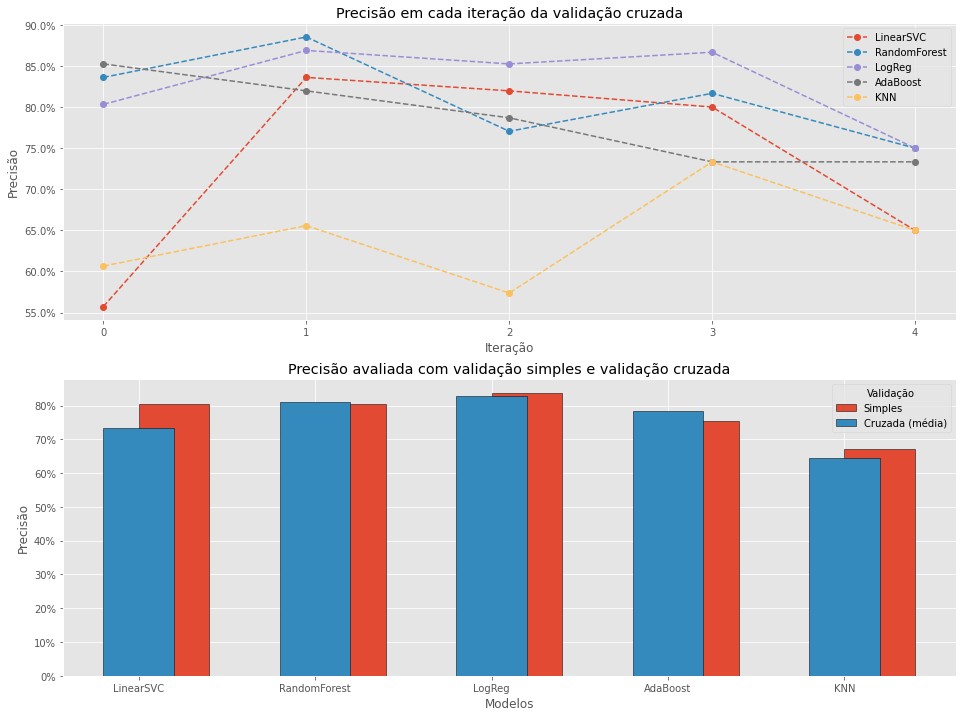

In [16]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 12))

for i in df_cv_models['Pontuação na validação cruzada (PVC)']:
  ax0.plot(i, '--o')

ax0.set(
    title='Precisão em cada iteração da validação cruzada',
    xlabel='Iteração',
    ylabel='Precisão',
    xticks = range(len(df_cv_models['Nome']))
)
ax0.legend(df_cv_models['Nome'])
ax0.yaxis.set_major_formatter(tick.PercentFormatter(1))

ax1.bar(
    x=df_cv_models['Nome'],
    height=df_cv_models['Pontuação'],
    width=0.4,
    align='edge',
    edgecolor='black',
    label='Simples')

ax1.bar(
    x=df_cv_models['Nome'],
    height=df_cv_models['Média da PVC'],
    width=0.4,
    edgecolor='black',
    label='Cruzada (média)')

ax1.set(
    title='Precisão avaliada com validação simples e validação cruzada',
    xlabel='Modelos',
    ylabel='Precisão'
)

ax1.legend(title='Validação', loc='best')
ax1.set_xticklabels(labels=df_cv_models['Nome'], rotation=0)
ax1.yaxis.set_major_formatter(tick.PercentFormatter(1))

Como indica a figura anterior, o modelo de Regressão logística ainda se mostrou soberano mesmo com a a validação cruzada. O modelo RandomForest foi o único capaz de equiparar-se em alguns pedaços da base de dados.

Dessa forma, o modelo usado será o de **Regressão logística**

## Melhorando o modelo

### Métricas de base

Antes de melhorar o modelo vamos treinar o modelo de base selecionado para usar como linha de base:

In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, RocCurveDisplay, auc

def evaluate_preds(y_true, y_preds):
    '''
    Função similar ao relatório de classificação, pra poupar tempo
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
      'accuracy': round(accuracy, 2),
      'precision': round(precision, 2),
      'recall': round(recall, 2),
      'f1': round(f1, 2)}

    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')

    return metric_dict

def plot_roc_curve(fpr, tpr, title=''):
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0,1],[0,1], '--', label='Advinhando')
    plt.xlabel('Taxa de positivos falsos')
    plt.ylabel('Taxa de positivos verdadeiros')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

In [69]:
np.random.seed(6)

clf = LogisticRegression(max_iter=1000)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.79
Recall: 0.90
F1 score: 0.84


### Métricas do `GridSearchCV`

> Como a regressão logística consta com poucos parâmetros, usa-se então o `GridSearchCV` para encontrar a melhor configuração do classificador:

In [70]:
from sklearn.model_selection import GridSearchCV
np.random.seed(6)

log_reg_grid = {
  'C' : np.logspace(-4, 4, 50),
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gs_clf = GridSearchCV(
  estimator=LogisticRegression(max_iter=10000),
  param_grid=log_reg_grid,
  cv=5,
  verbose=True)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.9636233...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [71]:
display(gs_clf.best_estimator_, gs_clf.score(X_test, y_test))

LogisticRegression(C=0.3906939937054613, max_iter=10000, solver='liblinear')

0.8360655737704918

Com os parâmetros acima foi possível verificar que a precisão do modelo não sofreu um ganho significativo. Dessa forma, recorre-se então ao modelo `RandomForest` que apresentou desempenho similar à regressão logística:

## Tentando outro modelo

In [75]:
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV